In [106]:
#Import from module 8



%matplotlib inline

import os
import io

# Core
import pandas as pd
import numpy as np

# Data
import json
from collections import defaultdict

# Visuals
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns


# Url
import urllib.parse

# Display Images
from PIL import Image, ImageFilter

# IPython display
from IPython.display import display

# Loading Zip Files
import zipfile

# Working with images
import cv2

# Progress Bar (for long processes)
from tqdm import tqdm

import pandas as pd

AttributeError: partially initialized module 'patsy' has no attribute 'highlevel' (most likely due to a circular import)

In [107]:
df = pd.read_excel('bitcoin5y.xlsx')

print(df.head())

print(df.isnull().sum())

print(df.info())

        Date      Open      High       Low     Close  Adj Close        Volume
0 2024-12-04  98751.58  98918.27  98533.15  98918.27    98918.27  77860888576
1 2024-12-03  95854.59  96297.20  93629.56  96002.16    96002.16  67067810961
2 2024-12-02  97276.01  98152.60  94482.87  95865.30    95865.30  72680784305
3 2024-12-01  96461.34  97888.13  95770.19  97279.79    97279.79  36590695296
4 2024-11-30  97468.81  97499.34  96144.22  96449.05    96449.05  31634227866
Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1827 non-null   datetime64[ns]
 1   Open        1827 non-null   float64       
 2   High        1827 non-null   float64       
 3   Low         1827 non-null   float64       
 4   Close   

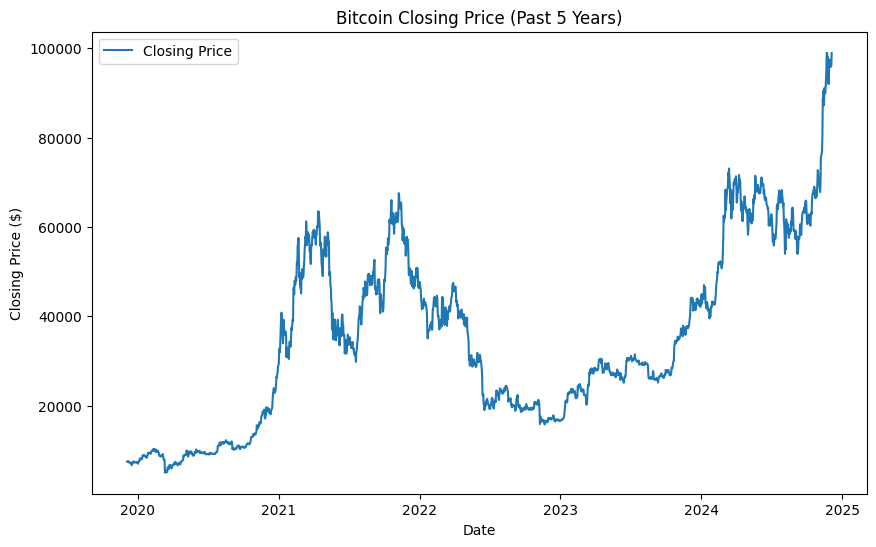

In [108]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price (Past 5 Years)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()


In [109]:
print(df.describe())


                                Date          Open          High  \
count                           1827   1827.000000   1827.000000   
mean   2022-06-05 00:00:00.000000256  34924.178205  35693.997176   
min              2019-12-05 00:00:00   5002.580000   5331.830000   
25%              2021-03-05 12:00:00  19231.970000  19513.435000   
50%              2022-06-05 00:00:00  30507.150000  31325.200000   
75%              2023-09-04 12:00:00  49037.615000  50310.790000   
max              2024-12-04 00:00:00  99006.740000  99655.500000   
std                              NaN  19948.528329  20399.790959   

                Low         Close    Adj Close         Volume  
count   1827.000000   1827.000000   1827.000000  1.827000e+03  
mean   34130.053864  34970.525315  34970.525315  3.249911e+10  
min     4106.980000   4970.790000   4970.790000  5.331173e+09  
25%    18920.010000  19244.450000  19244.450000  2.035523e+10  
50%    30044.500000  30548.700000  30548.700000  2.933388e+10  
75%

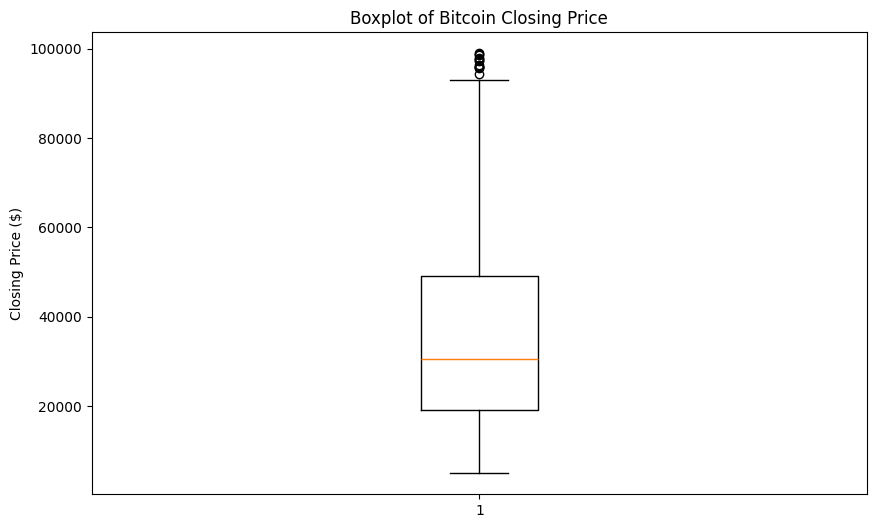

In [110]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Close'])
plt.title('Boxplot of Bitcoin Closing Price')
plt.ylabel('Closing Price ($)')
plt.show()


In [111]:
df = df.sort_values('Date')

train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")



Training Data Size: 1461
Testing Data Size: 366


In [112]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train_close = train_data['Close'].values.reshape(-1, 1)
test_close = test_data['Close'].values.reshape(-1, 1)

train_scaled = scaler.fit_transform(train_close)
test_scaled = scaler.transform(test_close)

def create_sequences(data, time_steps=60):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

time_steps = 60
x_train, y_train = create_sequences(train_scaled, time_steps)
x_test, y_test = create_sequences(test_scaled, time_steps)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

model = Sequential()

model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [114]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1562 - val_loss: 0.0034
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0330 - val_loss: 0.0061
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0182 - val_loss: 0.0194
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0155 - val_loss: 0.0024
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0099 - val_loss: 0.0033
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0091 - val_loss: 0.0022
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0076 - val_loss: 0.0022
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0060 - val_loss: 0.0029
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0045 - val_loss: 0.0016
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0056 - val_loss: 0.0040
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


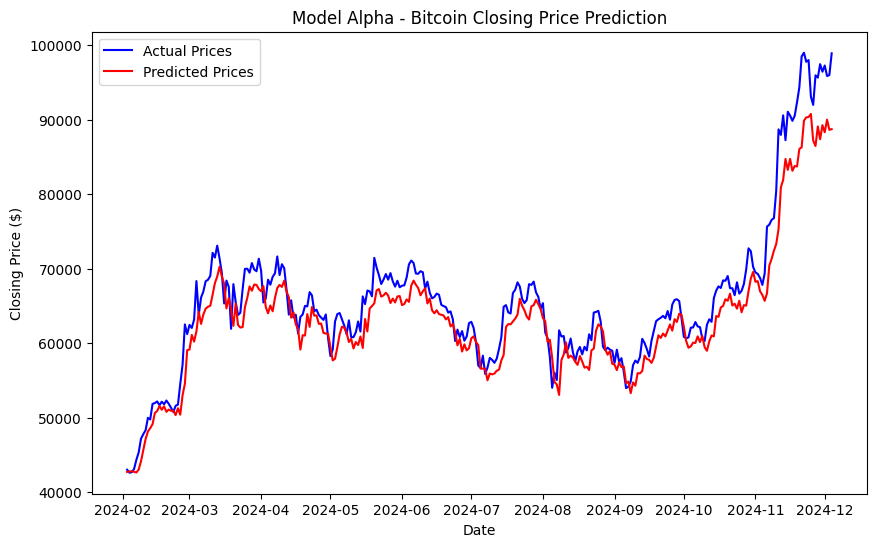

In [115]:
predicted_prices = model.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'][time_steps:], y_test_actual, color='blue', label='Actual Prices')
plt.plot(test_data['Date'][time_steps:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Model Alpha - Bitcoin Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()


In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - loss: 0.0735 - val_loss: 0.0060
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - loss: 0.0073 - val_loss: 0.0062
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - loss: 0.0038 - val_loss: 0.0129
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0037 - val_loss: 0.0076
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 0.0028 - val_loss: 0.0076
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0032 - val_loss: 0.0074
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 0.0033 - val_loss: 0.0077
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step - loss: 0.0032 - val_loss: 0.0086
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


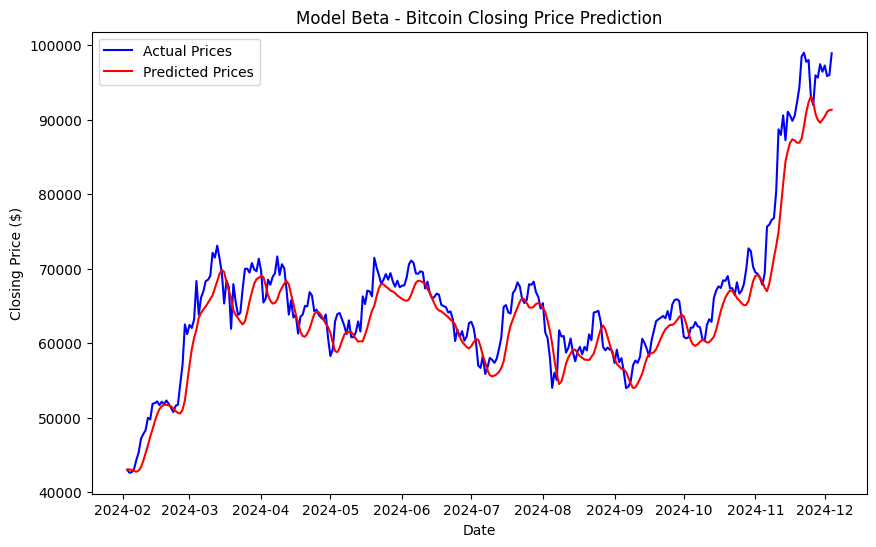

In [117]:
predicted_prices = model.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'][time_steps:], y_test_actual, color='blue', label='Actual Prices')
plt.plot(test_data['Date'][time_steps:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Model Beta - Bitcoin Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [118]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model2 = Sequential()

model2.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model2.add(Dropout(0.3))

model2.add(LSTM(units=100, return_sequences=False))
model2.add(Dropout(0.3))

model2.add(Dense(units=1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mean_squared_error')

model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - loss: 0.0481 - val_loss: 0.0078
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - loss: 0.0049 - val_loss: 0.0103
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - loss: 0.0037 - val_loss: 0.0074
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - loss: 0.0032 - val_loss: 0.0042
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - loss: 0.0036 - val_loss: 0.0073
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - loss: 0.0034 - val_loss: 0.0051
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0025 - val_loss: 0.0080
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - loss: 0.0027 - val_loss: 0.0068
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


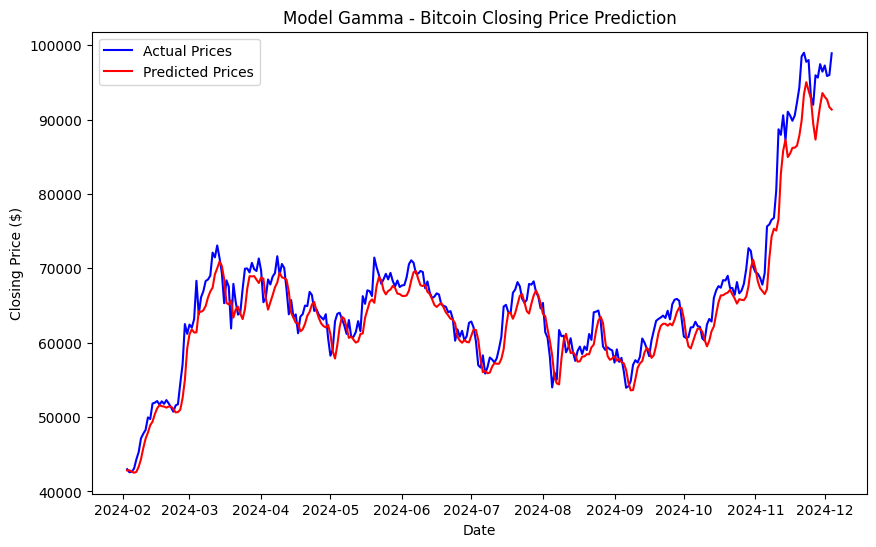

In [119]:
predicted_prices = model2.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'][time_steps:], y_test_actual, color='blue', label='Actual Prices')
plt.plot(test_data['Date'][time_steps:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Model Gamma - Bitcoin Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 275ms/step - loss: 0.1012 - val_loss: 0.1205
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - loss: 0.0165 - val_loss: 0.0059
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 264ms/step - loss: 0.0070 - val_loss: 0.0237
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - loss: 0.0042 - val_loss: 0.0073
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - loss: 0.0037 - val_loss: 0.0052
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0037 - val_loss: 0.0058
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - loss: 0.0033 - val_loss: 0.0061
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - loss: 0.0032 - val_loss: 0.0060
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 310ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


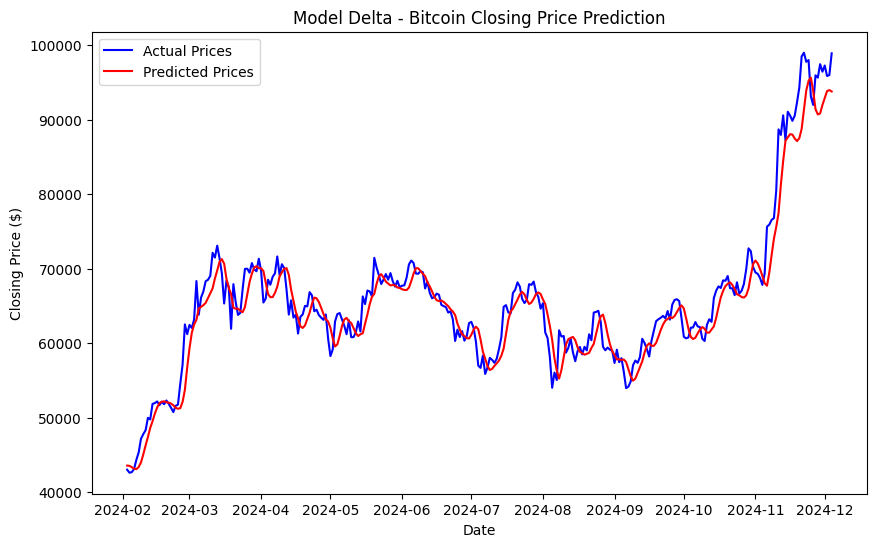

In [121]:
predicted_prices = model.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'][time_steps:], y_test_actual, color='blue', label='Actual Prices')
plt.plot(test_data['Date'][time_steps:], predicted_prices, color='red', label='Predicted Prices')
plt.title('Model Delta - Bitcoin Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [122]:
udf = pd.read_excel('Updated.xlsx')


udf = udf.sort_values('Date')

train_size = int(len(udf) * 0.8)
train_data = udf[:train_size]
test_data = udf[train_size:]

print(f"Training Data Size: {len(train_data)}")
print(f"Testing Data Size: {len(test_data)}")



Training Data Size: 1464
Testing Data Size: 367


In [123]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train_close = train_data['Close'].values.reshape(-1, 1)
test_close = test_data['Close'].values.reshape(-1, 1)

train_scaled = scaler.fit_transform(train_close)
test_scaled = scaler.transform(test_close)

def create_sequences(data, time_steps=60):
    x, y = [], []
    for i in range(time_steps, len(data)):
        x.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

time_steps = 60
x_train, y_train = create_sequences(train_scaled, time_steps)
x_test, y_test = create_sequences(test_scaled, time_steps)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


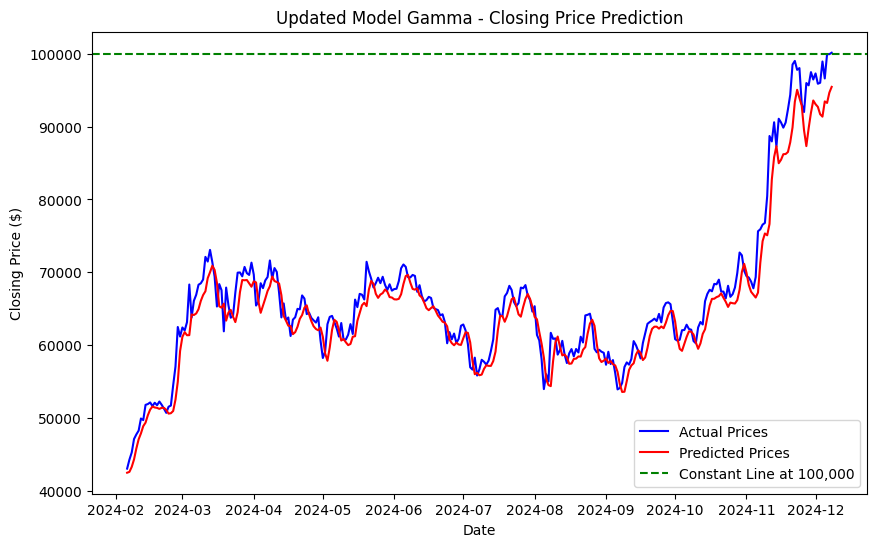

In [126]:
predicted_prices = model2.predict(x_test)


predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'][time_steps:], y_test_actual, color='blue', label='Actual Prices')
plt.plot(test_data['Date'][time_steps:], predicted_prices, color='red', label='Predicted Prices')
plt.axhline(y=100000, color='green', linestyle='--', label='Constant Line at 100,000')
plt.title('Updated Model Gamma - Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

In [125]:
import pandas as pd

last_7_actual = y_test_actual[-7:]
last_7_predicted = predicted_prices[-7:]
last_7_dates = test_data['Date'][-7:]

df_last_7 = pd.DataFrame({
    'Date': last_7_dates,
    'Actual Close Price ($)': last_7_actual.flatten(),
    'Predicted Close Price ($)': last_7_predicted.flatten()
})

print(df_last_7)


        Date  Actual Close Price ($)  Predicted Close Price ($)
6 2024-12-02                95865.30               92695.695312
5 2024-12-03                96002.16               91682.429688
4 2024-12-04                98918.27               91355.101562
3 2024-12-05                96593.57               93442.828125
2 2024-12-06                99920.71               93236.210938
1 2024-12-07                99923.34               94656.742188
0 2024-12-08               100121.52               95438.164062
